In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import sklearn
%matplotlib inline

In [62]:
raw_data = pd.read_csv('/Users/cappsjr/Desktop/epi_r2.csv')

In [63]:
raw_data.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
list(raw_data.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

In [65]:
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

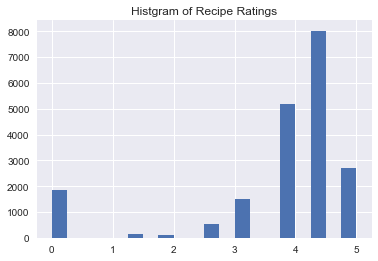

In [67]:
raw_data.rating.hist(bins=20)
plt.title('Histgram of Recipe Ratings')
plt.show()

In [68]:
# Count nulls
null_count = raw_data.isnull().sum()
null_count[null_count > 0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [69]:
from sklearn.svm import SVR
svr = SVR()
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'sodium', 'fat'], 1)
Y = raw_data.rating
svr.fit(X,Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

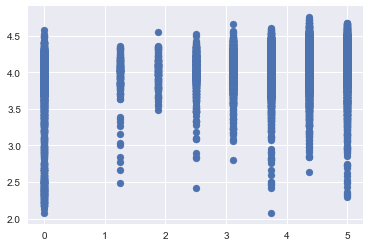

In [70]:
plt.scatter(Y, svr.predict(X))

In [71]:
svr.score(X,Y)

0.038565706512988962

In [72]:
from sklearn.model_selection import cross_val_score

cross_val_score(svr, X, Y, cv=5)

array([ 0.01818511,  0.026411  ,  0.03037705,  0.01957949,  0.02451197])

# Challenge

1. Transform this regression into a binary classifier

2. Clean up the feature set (top 30 features)

In [75]:
# Make new outcome variable for a binary classifier

raw_data['good_rating'] = np.where((raw_data['rating'] > 4.375), 1, 0)

In [78]:
# Find the optimal boundary and check the score with SVC

from sklearn.svm import SVC
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'sodium', 'fat', 'good_rating'], 1)
Y = raw_data.good_rating
svm = SVC(kernel='linear')
svm.fit(X,Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [79]:
svm.score(X,Y)

0.86480151605824851

In [84]:
# The score seems to have improved considerably when we transform the regression into a binary classifier
# Now lets try to reduce the number of features to the top 30 most valuable features

In [80]:
len(list(raw_data.columns))

681

In [81]:
# Lets run a PCA to reduce the number of features

# Standardize the data
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [87]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components = 30)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [92]:
# Assign the components from the PCA to a new DataFrame

new_data = pd.DataFrame()

for i in range(0, 30, 1):
    new_data[i] = Y_sklearn[:, i]

new_data['good_rating'] = raw_data['good_rating']

In [93]:
new_data.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,good_rating
0,1.731233,-1.708072,-1.196886,0.178223,-0.003450,0.718428,-2.798588,0.600058,-0.222853,-0.978911,...,1.215640,0.623165,0.298409,-2.146297,1.144109,-2.323846,-0.344157,-0.836139,1.065911,0
1,2.335097,1.093101,-1.339469,-2.315425,0.861559,-1.221326,0.113127,-1.320173,2.015847,1.040963,...,0.853268,-0.670591,-0.642033,0.219539,-0.456060,0.634135,1.357191,0.043114,-0.267632,0
2,1.910837,-1.246182,-1.005262,-0.859283,-0.415646,1.277453,0.788514,-0.541285,0.154533,-1.781590,...,-0.208189,0.315533,-0.050738,-0.182061,0.151528,0.549352,0.442831,-0.641809,-1.057690,0
3,-2.473887,-2.392181,1.561332,-0.071710,-0.523030,-0.785309,0.070677,3.219134,2.499364,-1.849333,...,0.980762,-1.268685,0.166136,-0.483628,0.195156,-1.658114,-1.027674,-0.255506,-0.193988,1
4,0.683491,-0.683437,-1.873932,-1.181534,-0.227076,2.025667,-1.737855,-0.523112,0.260612,-1.391388,...,0.494565,0.144228,-1.586339,0.630214,-0.432861,0.882920,1.276263,0.913265,0.152253,0


In [94]:
# Find the optimal boundary and check the score with SVC now that the top 30 components have been identified

from sklearn.svm import SVC
X = new_data.drop(['good_rating'], 1)
Y = new_data.good_rating
svm = SVC(kernel='linear')
svm.fit(X,Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [95]:
svm.score(X,Y)

0.86440255336126071